<a href="https://colab.research.google.com/github/bachtiar09/PredictCustomerClickedAdsClassificationbyUsingMachineLearning/blob/main/%60Predict_Customer_Clicked_Ads_Classification_by_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('https://drive.google.com/u/0/uc?id=1WwLxmK8PMLjjgG_Zh1Nkh02ZN2-3Wiyl&export=download')
pd.set_option('display.max_columns',None)
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


##EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


Timestamp harunya bertipe date/waktu

In [ ]:
df.Timestamp = pd.to_datetime(df.Timestamp) #sub feature enengering untuk merubah tipe data ibject menjadi datetime/waktu

In [ ]:
df.shape

(1000, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  987 non-null    float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               987 non-null    float64       
 3   Daily Internet Usage      989 non-null    float64       
 4   Male                      997 non-null    object        
 5   Timestamp                 1000 non-null   datetime64[ns]
 6   Clicked on Ad             1000 non-null   object        
 7   city                      1000 non-null   object        
 8   province                  1000 non-null   object        
 9   category                  1000 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 78.2+ KB


###Statistical analysis

In [ ]:
cat = []
num = []
dat = []
for i in df.columns: 
    if df[i].dtype == 'O':
        cat.append(i)
    elif df[i].dtype == 'int64' or df[i].dtype == 'float64':
        num.append(i)
    else:
        dat.append(i)

In [ ]:
df[num].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


In [ ]:
df[cat].describe().transpose()

,count,unique,top,freq
Male,997,2,Perempuan,518
Clicked on Ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


###Univariate analysis

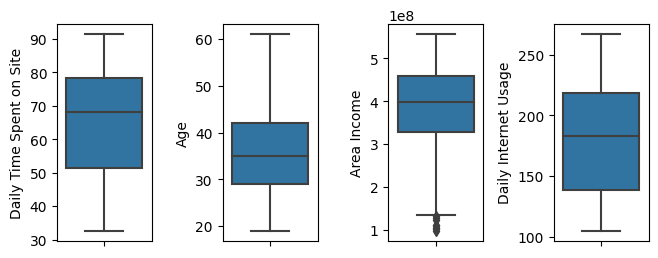

In [ ]:
plt.figure(figsize = (10,5))
for i in range(0, len(num)):
    plt.subplot(2,6, i+1)
    sns.boxplot(data= df, y=num[i], hue='Clicked on Ad', orient='v')
    plt.tight_layout()

**outlier** hanya pada kolom Area Income sedangkan kolom lainya tidak ada outlier
---



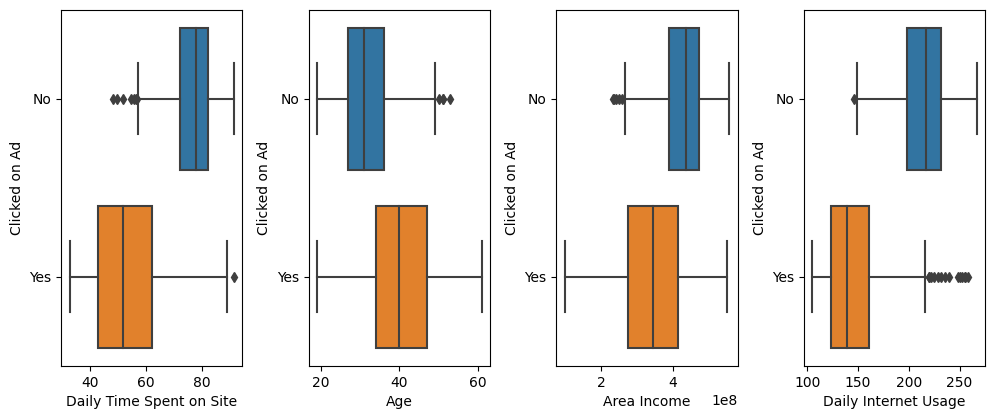

In [ ]:
plt.figure(figsize = (15,8))
for i in range(0, len(num)):
    plt.subplot(2,6, i+1)
    sns.boxplot(data= df, x=num[i], y='Clicked on Ad')
    plt.tight_layout()

outlier berdasarkan clicked on Ad semuah kolom pada katagore no terdapat outlier sedangkan pada katagori yes hanya pada kolom Age dan Area Income saja yang tidak terdapat outlier

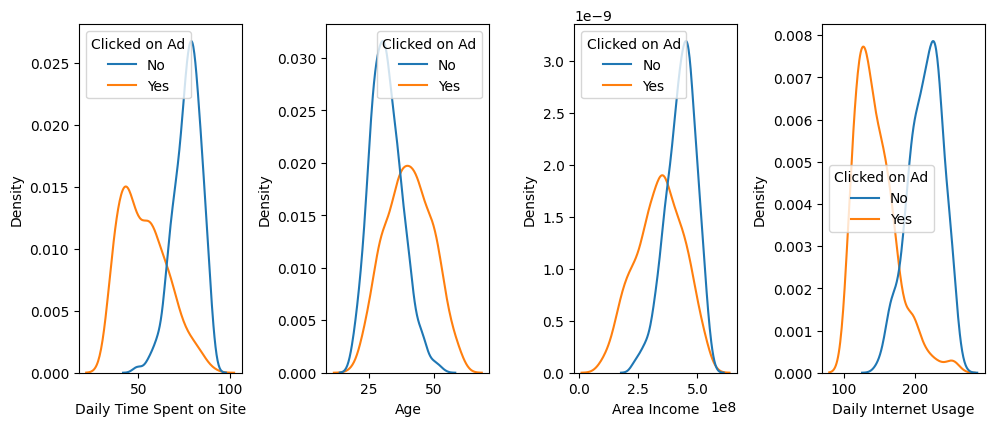

In [ ]:
plt.figure(figsize = (15,8))
for i in range(0, len(num)):
    plt.subplot(2,6, i+1)
    sns.kdeplot(data= df, x=num[i], hue='Clicked on Ad')
    plt.tight_layout()

hanya kolom Age yang berdistribusi normal sedangkan kolom lainya berdistribusi skew

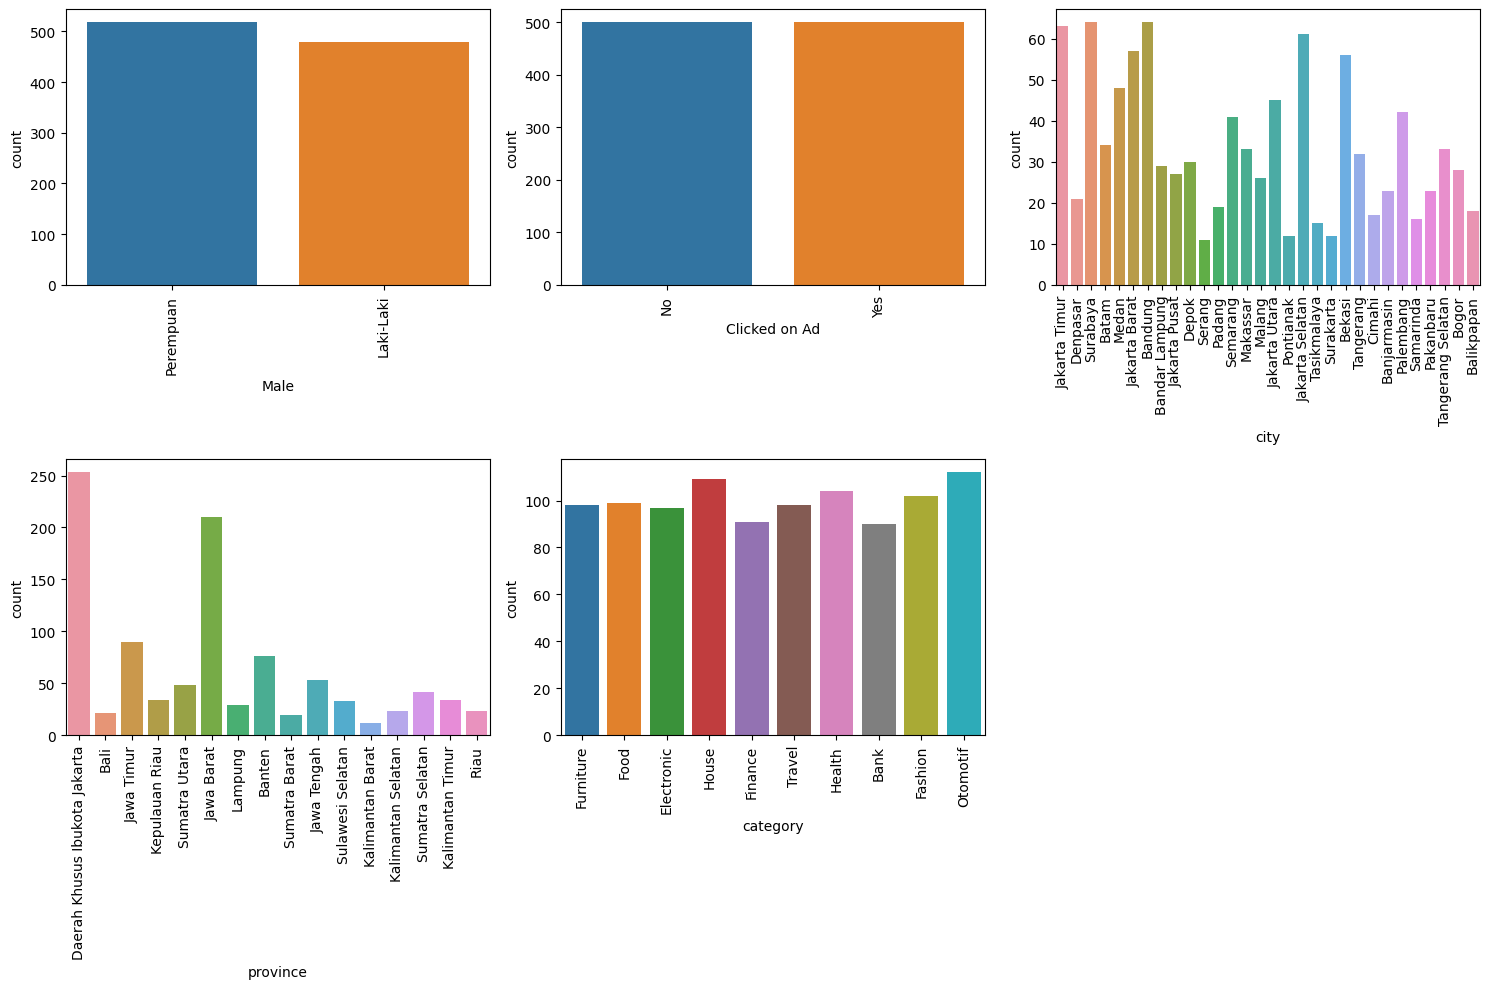

In [ ]:
plt.figure(figsize = (15,10))
for i in range(0, len(cat)):
    plt.subplot(2,3, i+1)
    sns.countplot(data= df, x=cat[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

###Multivariate analysis

<Axes: >

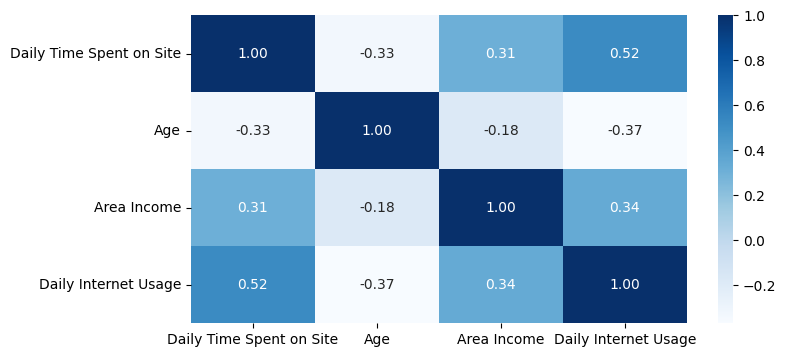

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

1. Feature Daily Time Spent on Site berkorelasi positif cukup kuat dengan Daily Internet Usage
2. Feature Age berkorelasi negatif lemah dengan feature Daily Time Spent on Site, Area Income, dan Daily Internet Usage
3. Feature Area Income berkorelasi positif dengan feature Daily Time Spent on Site dan Daily Internet Usage dan berkorelasi negatif dengan feature Age

<Figure size 800x800 with 0 Axes>

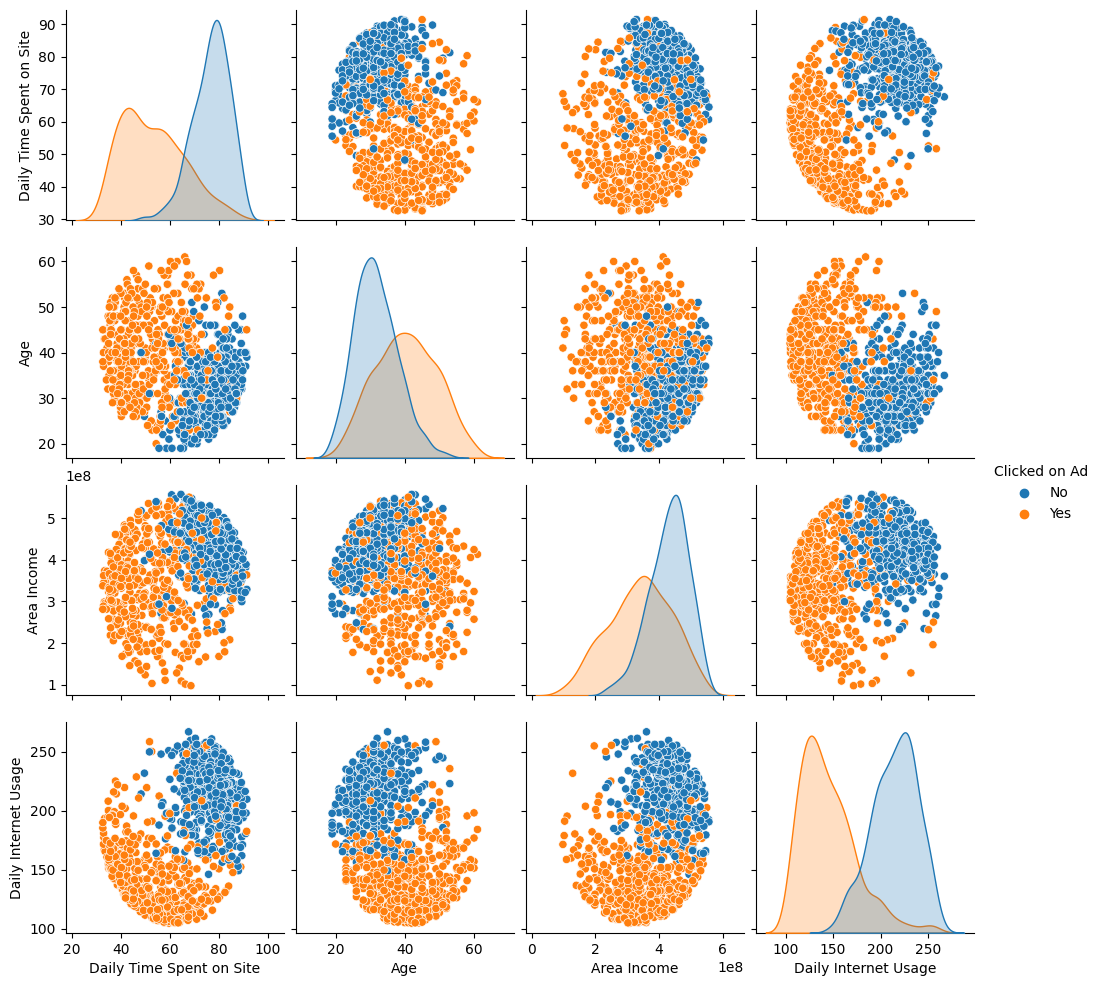

In [ ]:
plt.figure(figsize=(8, 8))
sns.pairplot(df, diag_kind='kde', hue= 'Clicked on Ad')

#Cleaning Data & Preprocessing

*   mising value
*   duplicate data
*   feature encoding
*   split data
*   ekstraksi pada kolom yang berhubungan dengan waktu






##Cleaning Data

####Missing Values

In [ ]:
df.isna().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [ ]:
df.dropna(inplace=True, subset=['Daily Time Spent on Site','Area Income','Daily Internet Usage','Male'])
#cek mising
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

####duplicate data

In [ ]:
df.duplicated().sum()

0

tidak ada data duplikat

####feature encoding

In [ ]:
df[cat].describe().transpose()

,count,unique,top,freq
Male,963,2,Perempuan,502
Clicked on Ad,963,2,Yes,485
city,963,30,Bandung,64
province,963,16,Daerah Khusus Ibukota Jakarta,244
category,963,10,Otomotif,108


In [ ]:
df['Male'] = np.where(df['Male']=='Laki-Laki',1,0) #jenis klamin
df['Clicked on Ad'] = np.where(df['Clicked on Ad']=='Yes',1,0) #klik ads

In [ ]:
for cat in ['category']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

####feature extraction

In [ ]:

df['year']=df.Timestamp.dt.year
df['month']=df.Timestamp.dt.month
df['week']=df.Timestamp.dt.isocalendar().week
df['day']=df.Timestamp.dt.day

####split data

In [ ]:
#drop kolom yang tidak di perlukan
X=df.drop(columns=['Timestamp','Clicked on Ad','city','province','category','year','month','week','day'])
Y=df['Clicked on Ad']
print(X.shape) 
print(Y.shape)
     

(963, 15)
(963,)


##Split Data Into Train set and Test set

In [ ]:
x = X.copy() 
y = Y.copy()

In [ ]:
x

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,68.95,35,432837300.0,256.09,0,0,0,0,0,0,1,0,0,0,0
1,80.23,31,479092950.0,193.77,1,0,0,0,0,1,0,0,0,0,0
2,69.47,26,418501580.0,236.50,0,0,1,0,0,0,0,0,0,0,0
3,74.15,29,383643260.0,245.89,1,0,0,0,0,0,0,0,1,0,0
4,68.37,35,517229930.0,225.58,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,43.70,28,441888720.0,173.01,0,0,0,1,0,0,0,0,0,0,0
995,72.97,30,499691990.0,208.58,1,0,0,0,1,0,0,0,0,0,0
996,51.30,45,474475190.0,134.42,1,0,1,0,0,0,0,0,0,0,0
998,55.55,19,293445530.0,187.95,0,1,0,0,0,0,0,0,0,0,0


#Experiment 1 : Modelling tanpa Normalisasi/Standarisasi
Data train 70-80% dan Data test 20-30%

In [ ]:
from sklearn.model_selection import train_test_split
# 70 : 30
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

##modeling
### experimen 1 : sebelum nomarmalisasi/standarisasi

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)
    
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

###Logistic Regression

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
# List of hyperparameter 
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
solver = ['liblinear', 'newton-cg','lbfgs']
multi_class= ['multinomial']
hyperparameters = dict(penalty=penalty, C=C, solver=solver, multi_class=multi_class)

# Initiation model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
logreg_grid = GridSearchCV(logres, hyperparameters, cv=5, scoring='accuracy')

# Fitting Model & Evaluation
logreg_grid.fit(x_train, y_train)
y_pred = logreg_grid.predict(x_test)
eval_classification(logreg_grid)

/usr/local/lib/python3.9/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/dis

Accuracy (Train Set): 0.87
Accuracy (Test Set): 0.86
Precision (Train Set): 0.82
Precision (Test Set): 0.79
Recall (Train Set): 0.97
Recall (Test Set): 0.96
AUC (test-proba): 0.97
AUC (train-proba): 0.97


/usr/local/lib/python3.9/dist-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [ ]:
show_best_hyperparameter(logreg_grid)

{'C': 0.0001, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [ ]:
#Re-iteration with the best parameters after the absence of overfitting and underfitting
lr_tuned = LogisticRegression(random_state=42,
                              C=0.0001,
                              penalty='l2',            
                              solver='newton-cg',
                              multi_class='multinomial'
                              ).fit(x_train, y_train)
eval_classification(lr_tuned)

/usr/local/lib/python3.9/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Accuracy (Train Set): 0.87
Accuracy (Test Set): 0.86
Precision (Train Set): 0.82
Precision (Test Set): 0.79
Recall (Train Set): 0.97
Recall (Test Set): 0.96
AUC (test-proba): 0.97
AUC (train-proba): 0.97


/usr/local/lib/python3.9/dist-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


###Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# List of hyperparameter
param_grid = { 
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [2,4,6,7,8],
    'min_samples_split' : [2, 5], 
    'min_samples_leaf' : [1, 2] 
}

# Initiation model
dtc=DecisionTreeClassifier(random_state=42)
dtc_grid = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 5, scoring='accuracy')

# Fitting Model & Evaluation
dtc_grid.fit(x_train, y_train)
y_pred = dtc_grid.predict(x_test)
eval_classification(dtc_grid)

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9

Accuracy (Train Set): 0.95
Accuracy (Test Set): 0.90
Precision (Train Set): 0.98
Precision (Test Set): 0.92
Recall (Train Set): 0.92
Recall (Test Set): 0.87
AUC (test-proba): 0.94
AUC (train-proba): 0.99


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [ ]:
show_best_hyperparameter(dtc_grid)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [ ]:
dt_tuned = DecisionTreeClassifier(random_state=42, 
                                   max_depth=3, 
                                   min_samples_split=2,
                                   min_samples_leaf= 1,
                                   max_features='auto',
                                   criterion='gini').fit(x_train, y_train)

eval_classification(dt_tuned)

Accuracy (Train Set): 0.87
Accuracy (Test Set): 0.86
Precision (Train Set): 0.89
Precision (Test Set): 0.86
Recall (Train Set): 0.85
Recall (Test Set): 0.86
AUC (test-proba): 0.86
AUC (train-proba): 0.89


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


###k-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# List of hyperparameter
n_neighbors = list(range(1,40))
p=[1]
algorithm = ['brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, hyperparameters, cv=5, scoring='accuracy')

# Fit Model & Evaluasi
knn_grid.fit(x_train, y_train)
y_pred = knn_grid.predict(x_test)
eval_classification(knn_grid)

Accuracy (Train Set): 0.71
Accuracy (Test Set): 0.69
Precision (Train Set): 0.76
Precision (Test Set): 0.72
Recall (Train Set): 0.63
Recall (Test Set): 0.58
AUC (test-proba): 0.75
AUC (train-proba): 0.79


In [ ]:
show_best_hyperparameter(knn_grid)

{'algorithm': 'brute', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 21, 'p': 1, 'weights': 'uniform'}


In [ ]:
knn_tuned = KNeighborsClassifier(n_neighbors =24, 
                                 p=1, 
                                 leaf_size=30,
                                 weights='uniform',
                                 algorithm = 'brute').fit(x_train, y_train)
eval_classification(knn_tuned)

Accuracy (Train Set): 0.71
Accuracy (Test Set): 0.72
Precision (Train Set): 0.78
Precision (Test Set): 0.77
Recall (Train Set): 0.60
Recall (Test Set): 0.60
AUC (test-proba): 0.76
AUC (train-proba): 0.78


### hasil recap
####logistic regresion : 
Accuracy (Train Set): 0.87
Accuracy (Test Set): 0.86
Precision (Train Set): 0.82
Precision (Test Set): 0.79
Recall (Train Set): 0.97
Recall (Test Set): 0.96
AUC (test-proba): 0.97
AUC (train-proba): 0.97

####Decision tree : 
Accuracy (Train Set): 0.87
Accuracy (Test Set): 0.86
Precision (Train Set): 0.89
Precision (Test Set): 0.86
Recall (Train Set): 0.85
Recall (Test Set): 0.86
AUC (test-proba): 0.86
AUC (train-proba): 0.89

####knn : 
Accuracy (Train Set): 0.71
Accuracy (Test Set): 0.72
Precision (Train Set): 0.78
Precision (Test Set): 0.77
Recall (Train Set): 0.60
Recall (Test Set): 0.60
AUC (test-proba): 0.76
AUC (train-proba): 0.78


karena variabel target (y) adalah varibel biner maka matrik yng digunakan adalah recall dari 3 model tersebut yang terbaik adalah logistic regresion dengan score 


*   Recall (Train Set): 0.97 
*   Recall (Test Set): 0.96



#Experiment 2 : Modelling dengan Normalisasi/Standarisasi

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
X_train_norm = mm.fit_transform(x_train)
X_test_norm = mm.transform(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(X_test_norm)
    y_pred_train = model.predict(X_train_norm)
    y_pred_proba = model.predict_proba(X_test_norm)
    y_pred_proba_train = model.predict_proba(X_train_norm)
    
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

###Logistic Regression

In [ ]:
# List of hyperparameter 
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
solver = ['liblinear', 'newton-cg','lbfgs']
multi_class= ['multinomial']
hyperparameters = dict(penalty=penalty, C=C, solver=solver, multi_class=multi_class)

# Initiation model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
logreg_grid = RandomizedSearchCV(logres, hyperparameters, cv=5, scoring='accuracy')

# Fitting Model & Evaluation
logreg_grid.fit(X_train_norm, y_train)
y_pred = logreg_grid.predict(X_test_norm)
eval_classification(logreg_grid)

Accuracy (Train Set): 0.97
Accuracy (Test Set): 0.98
Precision (Train Set): 0.97
Precision (Test Set): 0.98
Recall (Train Set): 0.96
Recall (Test Set): 0.98
AUC (test-proba): 0.99
AUC (train-proba): 0.99


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 64, in _check_solver
    raise ValueError(
ValueError: Only 'sag

In [ ]:
show_best_hyperparameter(logreg_grid)

{'C': 0.002, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [ ]:
#Iteration with the best parameters before normalization/standarizationg
lr_tuned = LogisticRegression(random_state=42,
                              C=0.002,
                              penalty='l2',            
                              solver='newton-cg',
                              multi_class='multinomial'
                              ).fit(X_train_norm, y_train)
eval_classification(lr_tuned)

Accuracy (Train Set): 0.97
Accuracy (Test Set): 0.98
Precision (Train Set): 0.97
Precision (Test Set): 0.98
Recall (Train Set): 0.96
Recall (Test Set): 0.98
AUC (test-proba): 0.99
AUC (train-proba): 0.99


###Decision Tree


In [ ]:
# List of hyperparameter
param_grid = { 
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [2,4,6,7,8],
    'min_samples_split' : [2, 5], 
    'min_samples_leaf' : [1, 2] 
}

# Initiation model
dtc=DecisionTreeClassifier(random_state=42)
dtc_grid = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 5, scoring='accuracy')

# Fitting Model & Evaluation
dtc_grid.fit(X_train_norm, y_train)
y_pred = dtc_grid.predict(X_test_norm)
eval_classification(dtc_grid)

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9

Accuracy (Train Set): 0.95
Accuracy (Test Set): 0.90
Precision (Train Set): 0.98
Precision (Test Set): 0.92
Recall (Train Set): 0.92
Recall (Test Set): 0.87
AUC (test-proba): 0.94
AUC (train-proba): 0.99


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9

In [ ]:
show_best_hyperparameter(dtc_grid)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [ ]:
dt_tuned = DecisionTreeClassifier(random_state=42, 
                                   max_depth=2, 
                                   min_samples_split=2,
                                   min_samples_leaf= 1,
                                   max_features='auto',
                                   criterion='gini').fit(X_train_norm, y_train)

eval_classification(dt_tuned)

Accuracy (Train Set): 0.87
Accuracy (Test Set): 0.86
Precision (Train Set): 0.89
Precision (Test Set): 0.86
Recall (Train Set): 0.85
Recall (Test Set): 0.86
AUC (test-proba): 0.86
AUC (train-proba): 0.88


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


### K-Nearest Neighbors

In [ ]:
# List of hyperparameter
n_neighbors = list(range(1,40))
p=[1]
algorithm = ['brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, hyperparameters, cv=5, scoring='accuracy')

# Fit Model & Evaluasi
knn_grid.fit(X_train_norm, y_train)
y_pred = knn_grid.predict(X_test_norm)
eval_classification(knn_grid)

Accuracy (Train Set): 0.97
Accuracy (Test Set): 0.97
Precision (Train Set): 1.00
Precision (Test Set): 0.99
Recall (Train Set): 0.95
Recall (Test Set): 0.94
AUC (test-proba): 0.98
AUC (train-proba): 1.00


In [ ]:
show_best_hyperparameter(knn_grid)

{'algorithm': 'brute', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [ ]:
knn_tuned = KNeighborsClassifier(n_neighbors =7, 
                                 p=1, 
                                 leaf_size=30,
                                 weights='uniform',
                                 algorithm = 'brute').fit(X_train_norm, y_train)
eval_classification(knn_tuned)

Accuracy (Train Set): 0.97
Accuracy (Test Set): 0.97
Precision (Train Set): 1.00
Precision (Test Set): 0.99
Recall (Train Set): 0.94
Recall (Test Set): 0.95
AUC (test-proba): 0.99
AUC (train-proba): 1.00


### hasil recap
###Logistic Regression :
Accuracy (Train Set): 0.94
Accuracy (Test Set): 0.96
Precision (Train Set): 0.91
Precision (Test Set): 0.93
Recall (Train Set): 0.98
Recall (Test Set): 0.99
AUC (test-proba): 0.99
AUC (train-proba): 0.99
###Decision Tree :
Accuracy (Train Set): 0.87
Accuracy (Test Set): 0.86
Precision (Train Set): 0.89
Precision (Test Set): 0.86
Recall (Train Set): 0.85
Recall (Test Set): 0.86
AUC (test-proba): 0.86
AUC (train-proba): 0.88
###K-Nearest Neighbors :
Accuracy (Train Set): 0.97
Accuracy (Test Set): 0.97
Precision (Train Set): 1.00
Precision (Test Set): 0.99
Recall (Train Set): 0.94
Recall (Test Set): 0.95
AUC (test-proba): 0.99
AUC (train-proba): 1.00

hasil dari experiment 2 dengan matrik yang digunakan recall maka model terbail masih sama dengan dengan experimen 1 yaitu logisttic regression dengan score 
* Recall (Train Set): 0.96
* Recall (Test Set): 0.98

#Model Evaluation

##Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
def cfm(y_test,y_pred):
    cf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,6))
    sns.set(font_scale = 1.5)
    ax = sns.heatmap(cf_matrix, annot=True,fmt = 'd')
    plt.title('Confusion Matrix From Test Set',fontsize=18)
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values')
    plt.show()

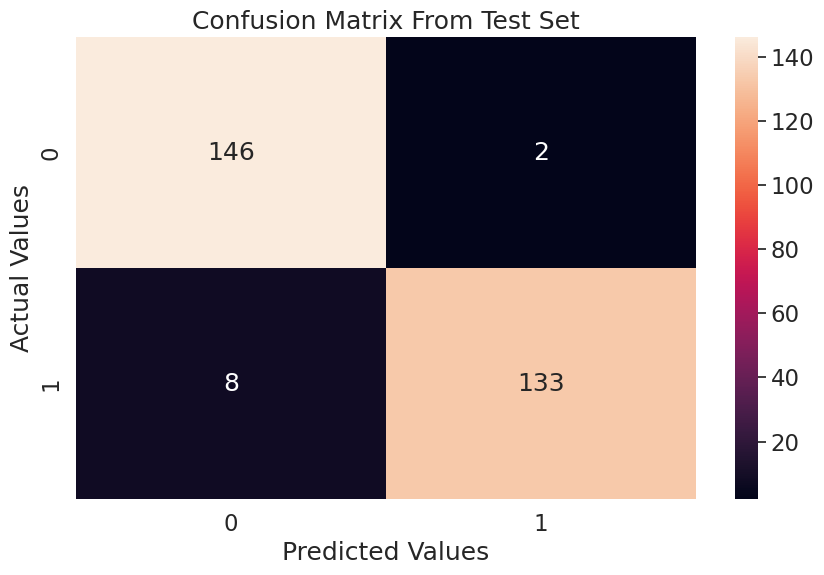

In [ ]:
cfm(y_test, y_pred)

##Feature Importance

In [ ]:
x.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'category_Bank', 'category_Electronic',
       'category_Fashion', 'category_Finance', 'category_Food',
       'category_Furniture', 'category_Health', 'category_House',
       'category_Otomotif', 'category_Travel'],
      dtype='object')

In [ ]:
list(enumerate(x))

[(0, 'Daily Time Spent on Site'),
 (1, 'Age'),
 (2, 'Area Income'),
 (3, 'Daily Internet Usage'),
 (4, 'Male'),
 (5, 'category_Bank'),
 (6, 'category_Electronic'),
 (7, 'category_Fashion'),
 (8, 'category_Finance'),
 (9, 'category_Food'),
 (10, 'category_Furniture'),
 (11, 'category_Health'),
 (12, 'category_House'),
 (13, 'category_Otomotif'),
 (14, 'category_Travel')]

In [ ]:
logreg_grid.best_estimator_.coef_

array([[-0.12270919,  0.06475585, -0.0610592 , -0.13188839, -0.00907501,
        -0.01037072, -0.0036824 ,  0.00435832,  0.00839075,  0.00238254,
        -0.00936174,  0.00523388,  0.00485062,  0.0073238 , -0.00912503]])

##Business Recommendation



1.   Berdasarkan data yang diperoleh kita mempunyai 2 segmen customer yaitu yang merespon iklan dan tidak. 
3. kita juga dapat melihat bahwa customer dengan aily Time Spent on Site dan Daily Internet Usage cenderung tidak merespon iklan mungkin karena terbiasa melihat iklan di internet dan mungkin iklan diaanggap menggagu
2.   Berdasarkan feature importance yang diperoleh kita dapat melihat bebrapa fiture yang penting yaitu Age dan beberapa  Category kareana memiliki koefisien positif variabel target Clicked on Ad
3. Berdasarkan temuan tersebut maka alangkah baiknya untuk menyesesuaikan iklan berdasrkan umur costomer denga mulai melakukan segementasi berdarkan umur sebagi target iklan yang akan diberikan 



##Model Based - Simulation

In [ ]:
f=pd.read_csv('https://drive.google.com/u/0/uc?id=1WwLxmK8PMLjjgG_Zh1Nkh02ZN2-3Wiyl&export=download')

In [ ]:
f.groupby(['Clicked on Ad'])['Clicked on Ad'].count().reset_index(drop=True)

0    500
1    500
Name: Clicked on Ad, dtype: int64

#### kita asmumsikan 


*   biaya iklan Rp 1000/user
*   jumlah user 1000 dimana 50% merespon iklan dan sissanya tidak
* cost = cost ads * n use
* Cost = Rp. 1000 * 1000 = Rp 1000.000
* revenue per customer klik sebesar Rp 3000
* Revenue = 500*3000 = Rp 1.500.000
* Provit = revenue - cost 
* Provit = 1.500.000 - 1.000.000 = Rp 500.000

setelah dilakukan model ML dengan akurasi convension rate 97% maka ada 970 user yang merespon iklan, maka :   

*   Revenue = 970*3000 = Rp 2.910.000
*   Provit = 2.910.000 - 1.000.000 = Rp 1.910.000

Berdasarkan simulasi di atas, jika kita tidak menggunakan model ML , maka kita akan mendapatkan pendapatan Rp 1.910.000 dan dengan menggunakan ML pendapatan meningkat secara signifikan. Kesimpulannya adalah ML dapat bekerja dengan baik menjadi potensi pendapatan



---

